In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Create Data for Store 577

In [2]:
date_rng = pd.date_range(start = '2019/01/01', end = '2020/07/31', freq = 'SM')

In [3]:
df = pd.DataFrame(date_rng, columns=['date'])

In [4]:
df['performance'] = np.random.randint(25000, 150000, size = (len(date_rng)))
df['expected'] = np.random.randint(20000, 200000, size = (len(date_rng)))

In [5]:
display = pd.melt(df, id_vars=['date'], value_vars=['performance','expected']).sort_values(by = ['date'])
#display.to_csv('./store_577data.csv')

### How did Store #577 perform against their individual monthly targets during the year of 2019? 

In [6]:
year_2019 = display[display['date'] < '2020/01/01']
year_2020 = display[display['date'] >= '2020/01/01']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

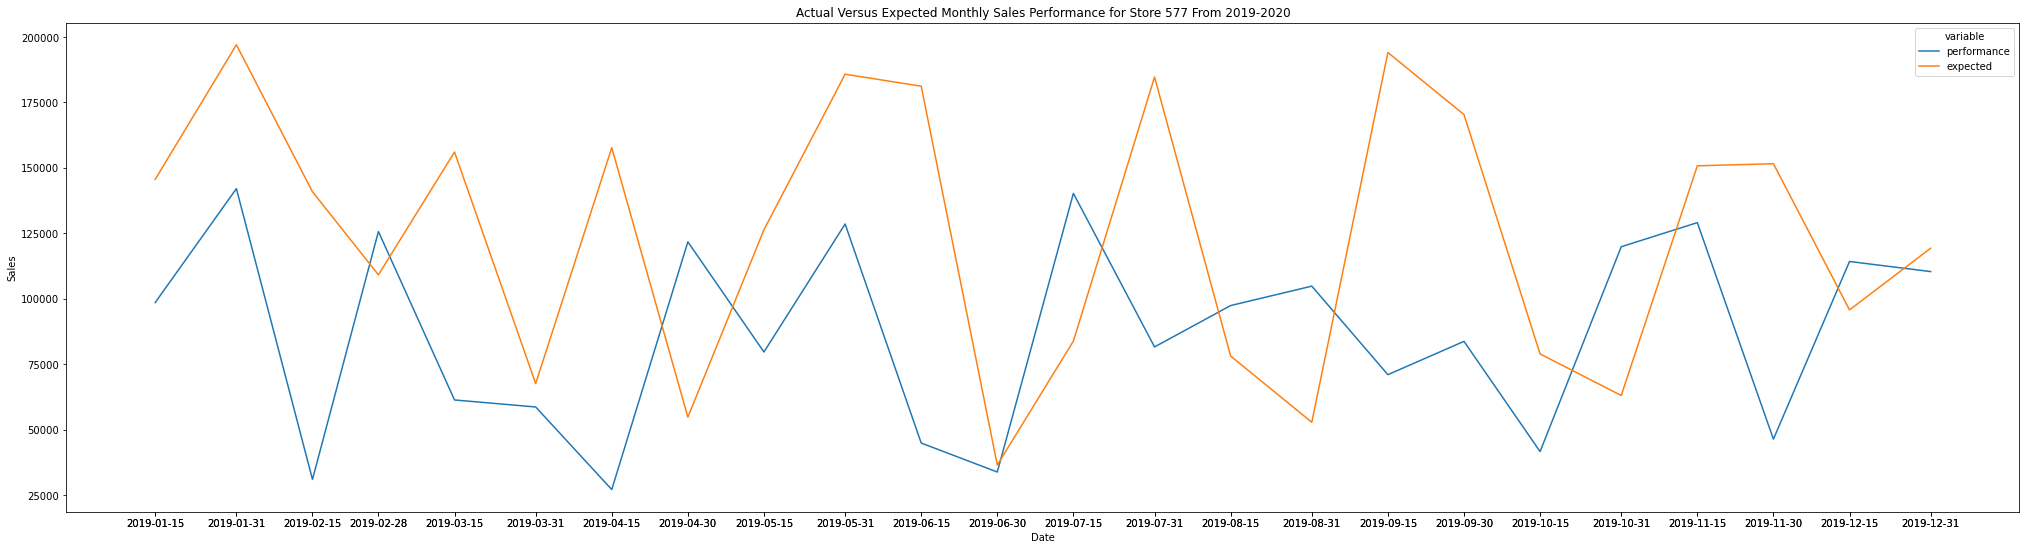

In [8]:
plt.figure(figsize = (35,9))
sns.lineplot(data = year_2019, x = 'date', y = 'value', hue = 'variable')
plt.title("Actual Versus Expected Monthly Sales Performance for Store 577 From 2019-2020")
plt.xlabel("Date")
plt.xticks(year_2019['date'])
plt.ylabel("Sales");
#plt.savefig('./store577_salesperformance_vs_metric.pdf')

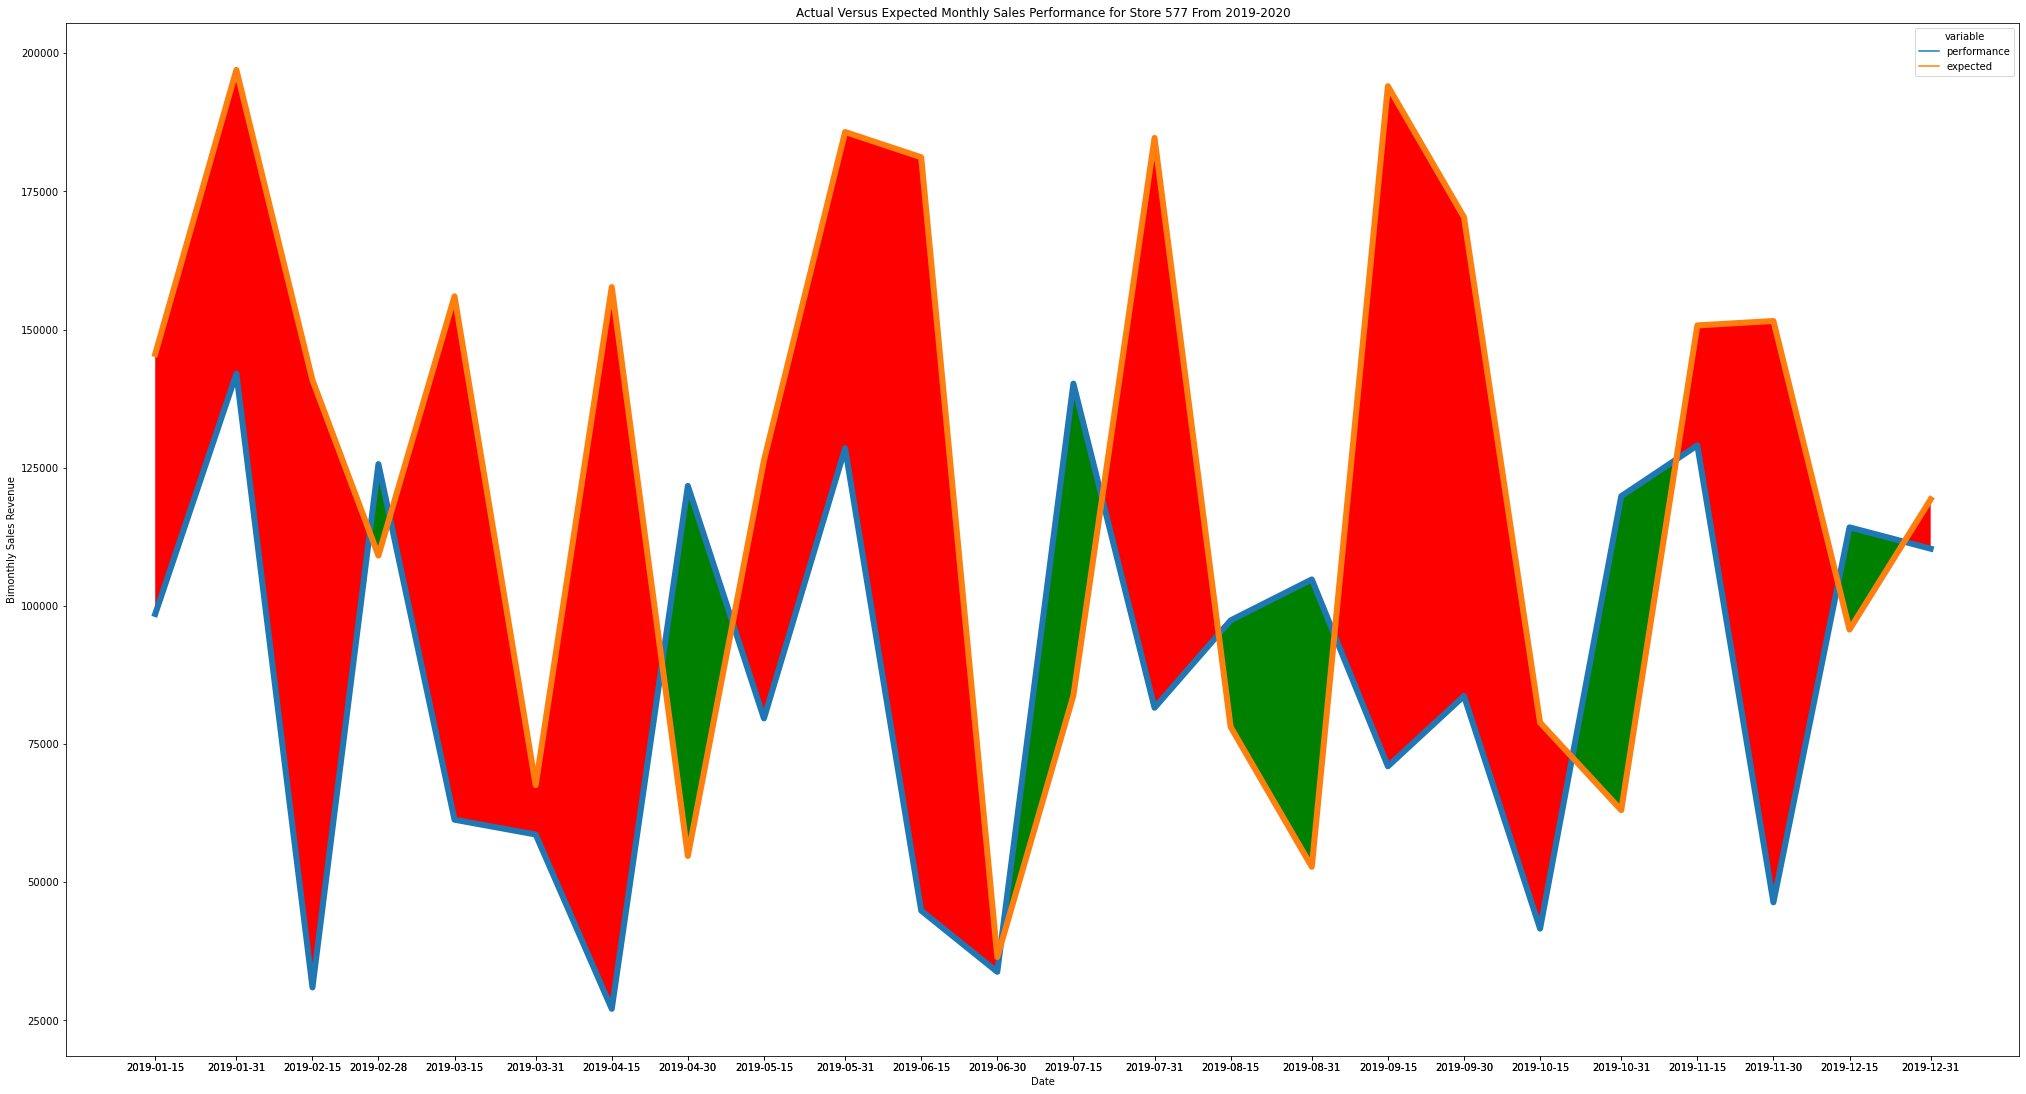

In [9]:
y1_check = year_2019[year_2019['variable'] == 'performance']['value'].to_numpy()
y2_check = year_2019[year_2019['variable'] == 'expected']['value'].to_numpy()

plt.figure(figsize = (35,19))

sns.lineplot(data = year_2019, x = 'date', y = 'value', hue = 'variable', linewidth = 6)
plt.fill_between(x = year_2019['date'].unique(), y1 = y1_check, y2 = y2_check, where = y1_check > y2_check, facecolor = 'green', interpolate=True)
plt.fill_between(year_2019['date'].unique(), y2_check, y1_check, where = y2_check >= y1_check, facecolor = 'red', interpolate=True)
plt.title("Actual Versus Expected Monthly Sales Performance for Store 577 From 2019-2020")
plt.xlabel("Date")
plt.xticks(year_2019['date'])
plt.ylabel("Bimonthly Sales Revenue");
#plt.savefig('./store_577_sales_performance_metric_2.pdf')

### How are the store sales trending so far in 2020?

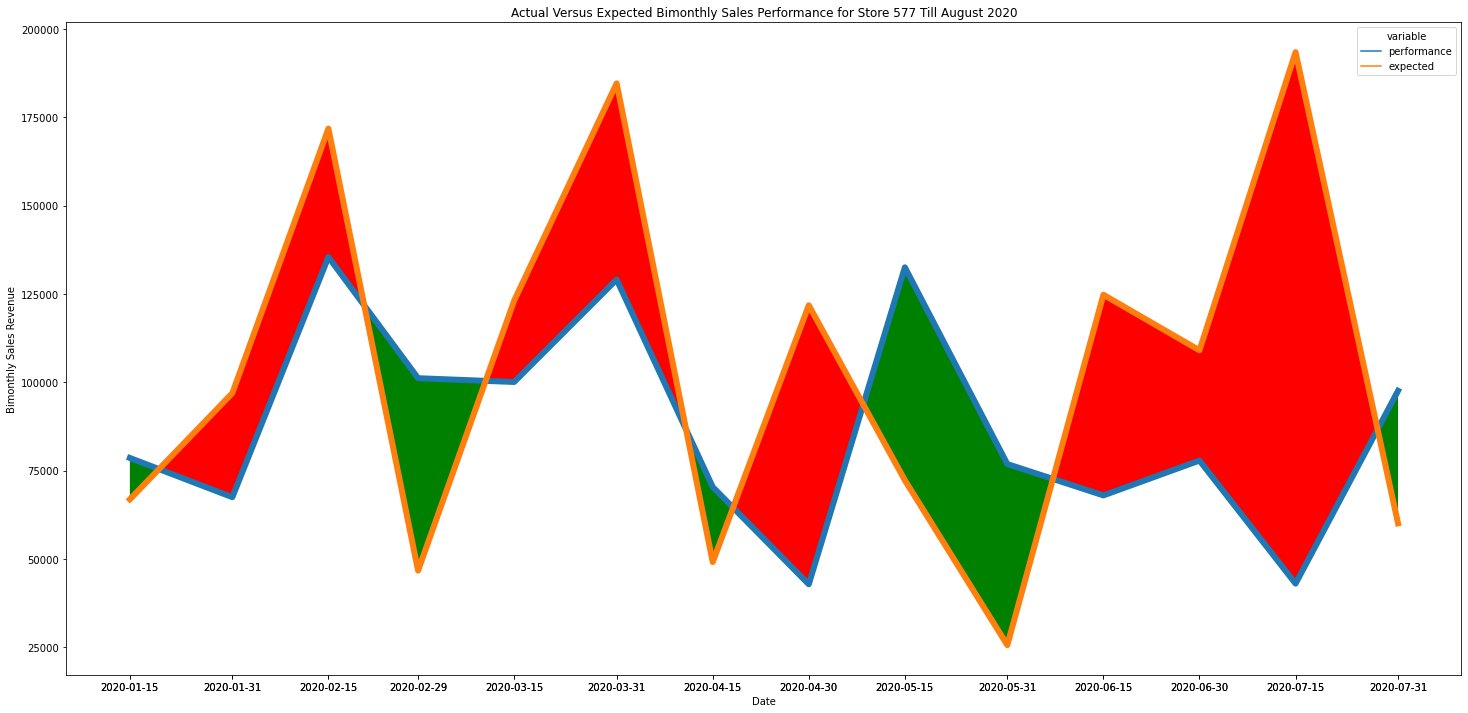

In [10]:
y1_check = year_2020[year_2020['variable'] == 'performance']['value'].to_numpy()
y2_check = year_2020[year_2020['variable'] == 'expected']['value'].to_numpy()

plt.figure(figsize = (25,12))

sns.lineplot(data = year_2020, x = 'date', y = 'value', hue = 'variable', linewidth = 6)
plt.fill_between(x = year_2020['date'].unique(), y1 = y1_check, y2 = y2_check, where = y1_check > y2_check, facecolor = 'green', interpolate=True)
plt.fill_between(year_2020['date'].unique(), y2_check, y1_check, where = y2_check >= y1_check, facecolor = 'red', interpolate=True)
plt.title("Actual Versus Expected Bimonthly Sales Performance for Store 577 Till August 2020")
plt.xlabel("Date")
plt.xticks(year_2020['date'])
plt.ylabel("Bimonthly Sales Revenue");
#plt.savefig('./store_577_store_sales_2020_line.pdf')

### Do you expect the store to meet their annual 2020 target by the end of the year?

In [12]:
remaining_total = sum(year_2019[year_2019['variable'] == 'expected'].value) - sum(year_2020[year_2020['variable'] == 'performance'].value)

underperform_by = remaining_total - 10*(np.mean(year_2020[year_2020['variable'] == 'performance'].value))

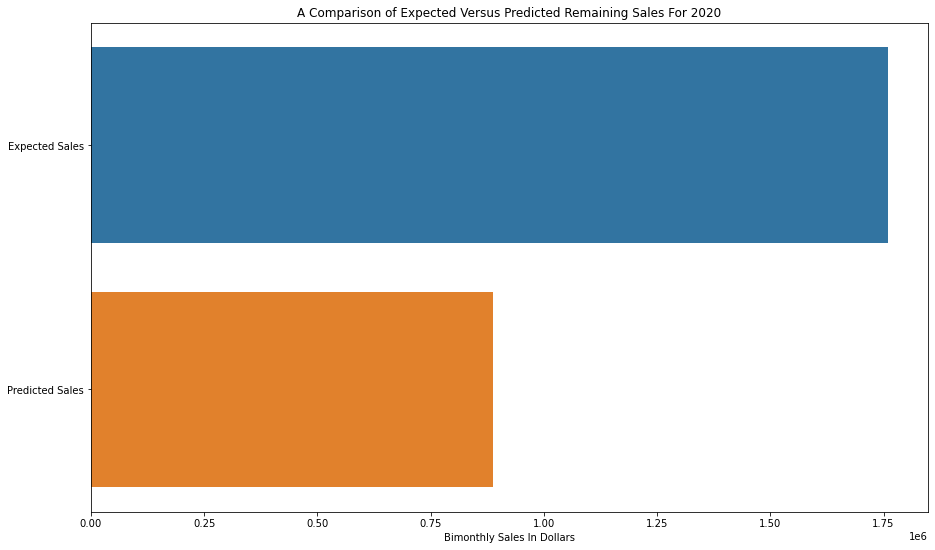

In [14]:
plt.figure(figsize = (15,9))
sns.barplot(x = [remaining_total, underperform_by], y = ['Expected Sales', 'Predicted Sales'])

plt.title("A Comparison of Expected Versus Predicted Remaining Sales For 2020")
plt.xlabel("Bimonthly Sales In Dollars");
#plt.savefig('./store_577_miss_annual_target.pdf')